In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
broker_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Broker_Data_clean.csv")
id_table_df = pd.read_csv("../Resources/Clean_Data_12_8_22/ID_table_clean.csv")
lat_lng_df = pd.read_csv("../Resources/Clean_Data_12_8_22/lat_lng_clean.csv")
mortgage_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Mortgage_Data_clean.csv")
property_char_df  = pd.read_csv("../Resources/Clean_Data_12_8_22/Prop_Charac_clean.csv")
public_rec_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Pub_Rec_clean.csv")
pub_remarks_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Pub_Remarks_clean.csv")
sales_data_df = pd.read_csv("../Resources/Clean_Data_12_8_22/Sales_Data_clean.csv")

# DISPLAYING ALL DATAFRAMES

In [3]:
broker_df.head(5)

,MLSNumber,Address,ListOfficeName,ListAgentName
0,DENC518086,2615 Pecksniff Rd,Patterson-Schwartz-Middletown,Dianne Platt
1,DENC518982,4938 S Tupelo Turn,"Long & Foster Real Estate, Inc.",Andrew White
2,DENC512992,15 Kristina Ct,"Long & Foster Real Estate, Inc.",Diane W Bacigalupi
3,DENC512104,3251 Champions Dr,"Long & Foster Real Estate, Inc.",Barbara Carpenter
4,DENC503480,3706 Lafayette St,Meyer & Meyer Realty,Peggy Cushing


In [4]:
id_table_df.head(5)

,MLSNumber,Address,Category,City,State,Zip_Code,County,MLSArea,Subdivision,School_District,Schools-Elementary,Schools-Middle,Schools-HighSchool
0,DENC518086,2615 Pecksniff Rd,RES,Wilmingon,DE,19808,NEWCASTLEDE,30903.0,SHERWOOD PARK II,Red Clay Consolidated,NaN,NaN,NaN
1,DENC518982,4938 S Tupelo Turn,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,PEPPER RIDGE,Red Clay Consolidated,NaN,NaN,NaN
2,DENC512992,15 Kristina Ct,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WOODMILL,Red Clay Consolidated,NaN,NaN,NaN
3,DENC512104,3251 Champions Dr,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,FAIRWAY FALLS,Red Clay Consolidated,NaN,NaN,NaN
4,DENC503480,3706 Lafayette St,RES,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WASHINGTON HEIGHTS,Red Clay Consolidated,NaN,NaN,NaN


In [5]:
lat_lng_df.head(5)

,MLSNumber,address_new,lat,lng
0,DENC518086,"2615 Pecksniff Wilmington, DE",39.734608,-75.661402
1,DENC2018974,"2615 Pecksniff Wilmington, DE",39.734608,-75.661402
2,DENC518982,"4938 S Tupelo Wilmington, DE",39.744655,-75.548391
3,DENC512992,"15 Kristina Wilmington, DE",39.744655,-75.548391
4,DENC512104,"3251 Champions Wilmington, DE",39.729664,-75.698656


In [6]:
mortgage_df.head(5)

,Tax_ID,Address,Lender,Mort_Amt,Mort_Type,Mort_Int_Rate,Mort_Term,Mort_Record_Date,Mort_Due_Date,Mort_Date
0,06-004.00-004.C.010,108 N Landis Way Unit #108,AMERICAN NBRHD MTG ACCPTNC AMERICAN NBRHD MTG ...,388000.0,"Conv,HomeEquityLoan",0.0,15,3/16/22,4/1/37,3/11/22
1,06-004.00-004.C.014,140 N Landis Way N Unit #140,WSFS MTG WSFS MTG,420000.0,"Conv,HomeEquityLoan",0.0,30,8/24/21,9/1/51,8/17/21
2,06-004.00-004.C.021,216 S Landis Way S Unit #216,WSFS MTG,220000.0,Conv,0.0,30,11/15/16,12/1/46,11/10/16
3,06-004.00-004.C.033,339 Cassell Ct Unit #339,RBS CITIZENS NA,165000.0,"Conv,HomeEquityLoan",0.0,25,10/17/14,10/10/39,10/6/14
4,06-004.00-004.C.034,346 Cassell Ct Unit #346,TRIDENT MTG CO LP TRIDENT MTG CO LP,297500.0,Conv,0.0,15,1/7/21,1/1/36,12/8/20


In [7]:
property_char_df.head(5)

,MLSNumber,Address,BuildingName,Ownership,Senior_Community_YN,Condo/Coop_Assoc_YN,HOA_YN,AssociationFee,AssociationFeeFrequency,Structure_Type,...,Garage_YN,GarageSpaces,GarageFeatures,Parking,ExteriorFeatures,ExteriorMaterial,Main_Roof,Foundation,PorchDeck,SwimmingPoolType
0,DENC518086,2615 Pecksniff Rd,NONE AVAILABLE,FeeSimple,No,No,Yes,$15,Annually,Detached,...,Yes,1.0,NaN,NaN,"ExtensiveHardscape,Sidewalks,StoneRetainingWal...","BrickFront,VinylSiding",ArchitecturalShingle,NaN,"Patios,Porches",NaN
1,DENC518982,4938 S Tupelo Turn,NaN,FeeSimple,No,No,No,NaN,NaN,Interior Row/Townhouse,...,No,NaN,NaN,NaN,NaN,"AluminumSiding,Brick,VinylSiding",Asphalt,NaN,NaN,NaN
2,DENC512992,15 Kristina Ct,NaN,FeeSimple,No,No,No,NaN,NaN,Interior Row/Townhouse,...,No,NaN,NaN,NaN,NaN,VinylSiding,NaN,NaN,NaN,NaN
3,DENC512104,3251 Champions Dr,NaN,FeeSimple,No,No,Yes,$50,Annually,Interior Row/Townhouse,...,Yes,1.0,NaN,NaN,NaN,Other,Shingle,NaN,Patios,NaN
4,DENC503480,3706 Lafayette St,NaN,FeeSimple,No,No,No,NaN,NaN,Detached,...,No,NaN,NaN,NaN,NaN,Asbestos,NaN,NaN,NaN,NaN


In [8]:
public_rec_df.head(5)

,MLSNumber,Tax_ID,Address-truncated,PropertyCityState,Zip_Code,Zip4,CarrierRoute,PropDoNotMail,OwnerNames,OwnerLastName,...,BldgSqFtTotal,Stories,Bedrooms,Exterior,BsmtDesc,FireplaceTotal,GrgType,HeatDelivery,YearBuilt,YearRemod
0,DENC518086,08-038.30-119,2615 Pecksniff,"Wilmington, DE",19808,3026.0,C010,N,James Robinson,Robinson,...,1875.0,1.0,3.0,"Brick, Aluminum, Vinyl",Finished,0.0,Att/BuiltIn/Bsmt,Hot Water/Steam,1958.0,0.0
1,DENC518982,08-036.10-081,4938 S Tupelo,"Wilmington, DE",19808,1026.0,C009,N,Xiaopeng Deng,Deng,...,1575.0,2.0,3.0,"Brick, Aluminum, Vinyl",Finished,0.0,NaN,Hot/Warm Air,1976.0,0.0
2,DENC512992,08-044.30-363,15 Kristina,"Wilmington, DE",19808,4063.0,C084,N,Robert F Walls,Walls,...,NaN,2.0,2.0,"Aluminum, Vinyl",NaN,0.0,NaN,Heat Pump,1985.0,0.0
3,DENC512104,08-036.40-376,3251 Champions,"Wilmington, DE",19808,2601.0,C039,N,Michael J Downs,Downs,...,NaN,2.0,2.0,Other,NaN,1.0,Att/BuiltIn/Bsmt,Heat Pump,1985.0,0.0
4,DENC503480,07-041.10-071,3706 Lafayette,"Wilmington, DE",19808,6014.0,C001,N,Maria Corona,Corona,...,NaN,1.0,3.0,Asbestos,NaN,0.0,NaN,Hot/Warm Air,1957.0,0.0


In [9]:
pub_remarks_df.head(5)

,Unnamed: 0,MLSNumber,Address,PublicRemarks
0,0,DENC518086,2615 Pecksniff Rd,Visit this home virtually: http://www.vht.com/...
1,1,DENC518982,4938 S Tupelo Turn,"3 bedroom, 1.5 bath townhome located in the he..."
2,2,DENC512992,15 Kristina Ct,"Location, Location, Location! This Woodmill to..."
3,3,DENC512104,3251 Champions Dr,"Move right into this 2 bedroom, 2.1 bath townh..."
4,4,DENC503480,3706 Lafayette St,This nicely maintained home is being sold to s...


In [10]:
sales_data_df.head(5)

,MLSNumber,Address,Status,Sold_Price,Sold_Price_less_Concession,Orig_List_Price,Current_List_Price,Days_on_Market,Previous_Days_on_Market,ListDate,StatusDate,Agreement_of_Sale_Date,SettledDate,Concessions_YN,Concessions_Remarks,SellerConcessionsAmount,FinalFinancing
0,DENC518086,2615 Pecksniff Rd,Closed,335000.0,335000.0,330000.0,330000.0,5.0,5.0,2020-12-11,2021-02-11,2020-12-16,2021-02-11,No,NaN,0.0,FHA
1,DENC518982,4938 S Tupelo Turn,Closed,200000.0,200000.0,215500.0,210000.0,47.0,67.0,2021-01-07,2021-04-08,2021-02-21,2021-04-08,No,NaN,0.0,Conventional
2,DENC512992,15 Kristina Ct,Closed,200000.0,200000.0,200000.0,200000.0,15.0,15.0,2020-12-28,2021-02-26,2021-01-09,2021-02-26,No,NaN,0.0,Conventional
3,DENC512104,3251 Champions Dr,Closed,200000.0,200000.0,219900.0,214900.0,11.0,11.0,2020-10-27,2020-12-14,2020-11-05,2020-12-11,No,NaN,0.0,Conventional
4,DENC503480,3706 Lafayette St,Closed,200000.0,200000.0,190000.0,190000.0,3.0,3.0,2020-06-20,2020-08-02,2020-06-21,2020-07-31,No,NaN,0.0,Conventional


# FIRST MERGE

### merge_df = sales_Data + id_table

In [11]:
merge_df = pd.merge(sales_data_df, id_table_df, on='MLSNumber')

In [12]:
merge_df

,MLSNumber,Address_x,Status,Sold_Price,Sold_Price_less_Concession,Orig_List_Price,Current_List_Price,Days_on_Market,Previous_Days_on_Market,ListDate,...,City,State,Zip_Code,County,MLSArea,Subdivision,School_District,Schools-Elementary,Schools-Middle,Schools-HighSchool
0,DENC518086,2615 Pecksniff Rd,Closed,335000.0,335000.0,330000.0,330000.0,5.0,5.0,2020-12-11,...,Wilmingon,DE,19808,NEWCASTLEDE,30903.0,SHERWOOD PARK II,Red Clay Consolidated,NaN,NaN,NaN
1,DENC518982,4938 S Tupelo Turn,Closed,200000.0,200000.0,215500.0,210000.0,47.0,67.0,2021-01-07,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,PEPPER RIDGE,Red Clay Consolidated,NaN,NaN,NaN
2,DENC512992,15 Kristina Ct,Closed,200000.0,200000.0,200000.0,200000.0,15.0,15.0,2020-12-28,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WOODMILL,Red Clay Consolidated,NaN,NaN,NaN
3,DENC512104,3251 Champions Dr,Closed,200000.0,200000.0,219900.0,214900.0,11.0,11.0,2020-10-27,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,FAIRWAY FALLS,Red Clay Consolidated,NaN,NaN,NaN
4,DENC503480,3706 Lafayette St,Closed,200000.0,200000.0,190000.0,190000.0,3.0,3.0,2020-06-20,...,Wilmington,DE,19808,NEWCASTLEDE,30903.0,WASHINGTON HEIGHTS,Red Clay Consolidated,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,DENC520114,101 Meriden Dr,Closed,595000.0,595000.0,595000.0,595000.0,5.0,5.0,2021-06-24,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,CANTERBURY HILLS,Red Clay Consolidated,NaN,NaN,NaN
5572,DENC520392,417 Snuff Mill Hill Rd,Closed,595000.0,591262.0,639000.0,639000.0,25.0,25.0,2021-03-29,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,SNUFF MILL,Red Clay Consolidated,Brandywine Springs,Henry B. Du Pont,Alexis I. Dupont
5573,DENC2014038,400 Wilson Ct,Closed,600000.0,600000.0,529900.0,529900.0,7.0,7.0,2022-01-14,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,STENNING WOODS,Red Clay Consolidated,North Star,Henry B. Du Pont,Alexis I. Dupont
5574,DENC2005484,918 Old Public Rd,Closed,600000.0,598000.0,620000.0,620000.0,25.0,25.0,2021-08-26,...,Hockessin,DE,19707,NEWCASTLEDE,30902.0,QUAKER LEA EAST,Red Clay Consolidated,NaN,NaN,NaN


## Beginning first stage cleaning 

In [13]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MLSNumber                   5576 non-null   object 
 1   Address_x                   5576 non-null   object 
 2   Status                      5576 non-null   object 
 3   Sold_Price                  5576 non-null   float64
 4   Sold_Price_less_Concession  5576 non-null   float64
 5   Orig_List_Price             5576 non-null   float64
 6   Current_List_Price          5576 non-null   float64
 7   Days_on_Market              5576 non-null   float64
 8   Previous_Days_on_Market     5576 non-null   float64
 9   ListDate                    5576 non-null   object 
 10  StatusDate                  5576 non-null   object 
 11  Agreement_of_Sale_Date      5576 non-null   object 
 12  SettledDate                 5576 non-null   object 
 13  Concessions_YN              5576 

In [14]:
merge_df["Zip_Code"] = merge_df["Zip_Code"].astype(str)

In [15]:
merge_df["Subdivision"]

0         SHERWOOD PARK II
1             PEPPER RIDGE
2                 WOODMILL
3            FAIRWAY FALLS
4       WASHINGTON HEIGHTS
               ...        
5571      CANTERBURY HILLS
5572            SNUFF MILL
5573        STENNING WOODS
5574       QUAKER LEA EAST
5575         ADARE VILLAGE
Name: Subdivision, Length: 5576, dtype: object

In [16]:
merge_df = merge_df.drop(merge_df.columns[1:4],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MLSNumber                   5576 non-null   object 
 1   Sold_Price_less_Concession  5576 non-null   float64
 2   Orig_List_Price             5576 non-null   float64
 3   Current_List_Price          5576 non-null   float64
 4   Days_on_Market              5576 non-null   float64
 5   Previous_Days_on_Market     5576 non-null   float64
 6   ListDate                    5576 non-null   object 
 7   StatusDate                  5576 non-null   object 
 8   Agreement_of_Sale_Date      5576 non-null   object 
 9   SettledDate                 5576 non-null   object 
 10  Concessions_YN              5576 non-null   object 
 11  Concessions_Remarks         339 non-null    object 
 12  SellerConcessionsAmount     5576 non-null   float64
 13  FinalFinancing              5576 

In [17]:
merge_df = merge_df.drop(merge_df.columns[[1,3]],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MLSNumber                5576 non-null   object 
 1   Orig_List_Price          5576 non-null   float64
 2   Days_on_Market           5576 non-null   float64
 3   Previous_Days_on_Market  5576 non-null   float64
 4   ListDate                 5576 non-null   object 
 5   StatusDate               5576 non-null   object 
 6   Agreement_of_Sale_Date   5576 non-null   object 
 7   SettledDate              5576 non-null   object 
 8   Concessions_YN           5576 non-null   object 
 9   Concessions_Remarks      339 non-null    object 
 10  SellerConcessionsAmount  5576 non-null   float64
 11  FinalFinancing           5576 non-null   object 
 12  Address_y                5576 non-null   object 
 13  Category                 5576 non-null   object 
 14  City                    

In [18]:
merge_df = merge_df.drop(merge_df.columns[2:16],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MLSNumber           5576 non-null   object 
 1   Orig_List_Price     5576 non-null   float64
 2   Zip_Code            5576 non-null   object 
 3   County              5576 non-null   object 
 4   MLSArea             5560 non-null   float64
 5   Subdivision         5576 non-null   object 
 6   School_District     5576 non-null   object 
 7   Schools-Elementary  1373 non-null   object 
 8   Schools-Middle      1356 non-null   object 
 9   Schools-HighSchool  1485 non-null   object 
dtypes: float64(2), object(8)
memory usage: 479.2+ KB


In [19]:
merge_df = merge_df.drop(merge_df.columns[[3,4,7,8,9]],axis=1)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MLSNumber        5576 non-null   object 
 1   Orig_List_Price  5576 non-null   float64
 2   Zip_Code         5576 non-null   object 
 3   Subdivision      5576 non-null   object 
 4   School_District  5576 non-null   object 
dtypes: float64(1), object(4)
memory usage: 261.4+ KB


## Beginning Second Merge

### merge_df_stage_2 = merge_df + property_char_df

In [20]:
merge_df_stage_2 = pd.merge(merge_df, property_char_df , on='MLSNumber')

In [21]:
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MLSNumber                  5576 non-null   object 
 1   Orig_List_Price            5576 non-null   float64
 2   Zip_Code                   5576 non-null   object 
 3   Subdivision                5576 non-null   object 
 4   School_District            5576 non-null   object 
 5   Address                    5576 non-null   object 
 6   BuildingName               1139 non-null   object 
 7   Ownership                  5576 non-null   object 
 8   Senior_Community_YN        5576 non-null   object 
 9   Condo/Coop_Assoc_YN        5576 non-null   object 
 10  HOA_YN                     5576 non-null   object 
 11  AssociationFee             1582 non-null   object 
 12  AssociationFeeFrequency    1582 non-null   object 
 13  Structure_Type             5576 non-null   objec

In [22]:
merge_df_stage_2["BasementType"].sample(10)

257                                               Partial
1717                                                  NaN
437                                                  Full
1912    DrainageSystem,Full,PouredConcrete,SumpPump,Un...
5335                                                 Full
3650                                   Full,FullyFinished
4272                                   Full,FullyFinished
360     Full,RearEntrance,SumpPump,Unfinished,WalkoutL...
1305                                                  NaN
4662            Improved,OutsideEntrance,Partial,Shelving
Name: BasementType, dtype: object

In [23]:
merge_df_stage_2 = merge_df_stage_2.drop(merge_df_stage_2.columns[[8,9,11,12,16,17,20,23,27,31,32,33,39,42,44,45,46,47,49,50,51,52,54,55,56,57,59,60,61,62]],axis=1)
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         5576 non-null   object 
 1   Orig_List_Price   5576 non-null   float64
 2   Zip_Code          5576 non-null   object 
 3   Subdivision       5576 non-null   object 
 4   School_District   5576 non-null   object 
 5   Address           5576 non-null   object 
 6   BuildingName      1139 non-null   object 
 7   Ownership         5576 non-null   object 
 8   HOA_YN            5576 non-null   object 
 9   Structure_Type    5576 non-null   object 
 10  Acres             5354 non-null   float64
 11  LotDimensions     4847 non-null   object 
 12  Age               5576 non-null   float64
 13  InteriorSqFt      5576 non-null   float64
 14  AboveGradeSqFt    5576 non-null   float64
 15  BelowGradeSqFt    5394 non-null   float64
 16  Bedrooms          5571 non-null   float64


In [24]:
merge_df_stage_2 = merge_df_stage_2.drop(merge_df_stage_2.columns[[6]],axis=1)

In [25]:
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         5576 non-null   object 
 1   Orig_List_Price   5576 non-null   float64
 2   Zip_Code          5576 non-null   object 
 3   Subdivision       5576 non-null   object 
 4   School_District   5576 non-null   object 
 5   Address           5576 non-null   object 
 6   Ownership         5576 non-null   object 
 7   HOA_YN            5576 non-null   object 
 8   Structure_Type    5576 non-null   object 
 9   Acres             5354 non-null   float64
 10  LotDimensions     4847 non-null   object 
 11  Age               5576 non-null   float64
 12  InteriorSqFt      5576 non-null   float64
 13  AboveGradeSqFt    5576 non-null   float64
 14  BelowGradeSqFt    5394 non-null   float64
 15  Bedrooms          5571 non-null   float64
 16  Baths             5571 non-null   float64


#### Dropping LotDimensions , FireplaceCount. Will add again if needed if it provides signicant contribution to ml model


In [26]:
merge_df_stage_2 = merge_df_stage_2.drop(merge_df_stage_2.columns[[10,28]],axis=1)
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         5576 non-null   object 
 1   Orig_List_Price   5576 non-null   float64
 2   Zip_Code          5576 non-null   object 
 3   Subdivision       5576 non-null   object 
 4   School_District   5576 non-null   object 
 5   Address           5576 non-null   object 
 6   Ownership         5576 non-null   object 
 7   HOA_YN            5576 non-null   object 
 8   Structure_Type    5576 non-null   object 
 9   Acres             5354 non-null   float64
 10  Age               5576 non-null   float64
 11  InteriorSqFt      5576 non-null   float64
 12  AboveGradeSqFt    5576 non-null   float64
 13  BelowGradeSqFt    5394 non-null   float64
 14  Bedrooms          5571 non-null   float64
 15  Baths             5571 non-null   float64
 16  BathsFull         5571 non-null   float64


In [27]:
merge_df_stage_2 = merge_df_stage_2.dropna()
merge_df_stage_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 5575
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code          4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms          4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


## Beginning third Merge

### merge_df_stage_3 = merge_df_stage_2 + public_rec_df

In [28]:
merge_df_stage_3 = pd.merge(merge_df_stage_2,public_rec_df,on='MLSNumber')

In [29]:
merge_df_stage_3.sample(5)

,MLSNumber,Orig_List_Price,Zip_Code_x,Subdivision,School_District,Address,Ownership,HOA_YN,Structure_Type,Acres,...,BldgSqFtTotal,Stories,Bedrooms_y,Exterior,BsmtDesc,FireplaceTotal,GrgType,HeatDelivery_y,YearBuilt,YearRemod
2267,DENC499066,449900.0,19803,NONE AVAILABLE,Brandywine,98 Husbands Dr,FeeSimple,No,Detached,0.55,...,NaN,2.0,4.0,"Brick, Asbestos",NaN,2.0,Att/BuiltIn/Bsmt,Hot Water/Steam,1966.0,0.0
1391,DENC520990,269900.0,19805,BROOKLAND TERRACE,Red Clay Consolidated,426 Ohio Ave,FeeSimple,No,Detached,0.14,...,1400.0,1.0,2.0,"Aluminum, Vinyl",NaN,0.0,NaN,Hot Water/Steam,1940.0,0.0
1206,DENC509562,209000.0,19805,SQUIRREL RUN,Red Clay Consolidated,600-Unit 203 N Ford Ave #203,FeeSimple,No,Unit/Flat/Apartment,0.00,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4685,DENC499688,284900.0,19707,MENDENHALL VILLAGE,Red Clay Consolidated,630 Lamplighter Way,FeeSimple,Yes,End of Row/Townhouse,0.12,...,NaN,2.0,3.0,"Brick, Aluminum, Vinyl",NaN,1.0,NaN,Heat Pump,1985.0,0.0
3463,DENC525072,249900.0,19720,DUROSS HEIGHTS,Colonial,52 Betts Ave,FeeSimple,No,Detached,0.33,...,NaN,1.5,3.0,Stucco,NaN,1.0,NaN,Hot/Warm Air,1956.0,0.0


In [30]:
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MLSNumber                4944 non-null   object 
 1   Orig_List_Price          4944 non-null   float64
 2   Zip_Code_x               4944 non-null   object 
 3   Subdivision              4944 non-null   object 
 4   School_District          4944 non-null   object 
 5   Address                  4944 non-null   object 
 6   Ownership                4944 non-null   object 
 7   HOA_YN                   4944 non-null   object 
 8   Structure_Type           4944 non-null   object 
 9   Acres                    4944 non-null   float64
 10  Age                      4944 non-null   float64
 11  InteriorSqFt             4944 non-null   float64
 12  AboveGradeSqFt           4944 non-null   float64
 13  BelowGradeSqFt           4944 non-null   float64
 14  Bedrooms_x              

In [31]:
merge_df_stage_3["Ownership"].sample(5)

2502    FeeSimple
2949    FeeSimple
4460    FeeSimple
3019    FeeSimple
1672    FeeSimple
Name: Ownership, dtype: object

In [32]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[30:54],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [33]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[30:47],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [34]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[34:44],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [35]:
merge_df_stage_3 = merge_df_stage_3.drop(merge_df_stage_3.columns[35],axis=1)
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 4943
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4944 non-null   object 
 1   Orig_List_Price   4944 non-null   float64
 2   Zip_Code_x        4944 non-null   object 
 3   Subdivision       4944 non-null   object 
 4   School_District   4944 non-null   object 
 5   Address           4944 non-null   object 
 6   Ownership         4944 non-null   object 
 7   HOA_YN            4944 non-null   object 
 8   Structure_Type    4944 non-null   object 
 9   Acres             4944 non-null   float64
 10  Age               4944 non-null   float64
 11  InteriorSqFt      4944 non-null   float64
 12  AboveGradeSqFt    4944 non-null   float64
 13  BelowGradeSqFt    4944 non-null   float64
 14  Bedrooms_x        4944 non-null   float64
 15  Baths             4944 non-null   float64
 16  BathsFull         4944 non-null   float64


In [115]:
merge_df_stage_3 = merge_df_stage_3.dropna()
merge_df_stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLSNumber         4918 non-null   object 
 1   Orig_List_Price   4918 non-null   float64
 2   Zip_Code          4918 non-null   object 
 3   Subdivision       4918 non-null   object 
 4   School_District   4918 non-null   object 
 5   Address           4918 non-null   object 
 6   Ownership         4918 non-null   object 
 7   HOA_YN            4918 non-null   object 
 8   Structure_Type    4918 non-null   object 
 9   Acres             4918 non-null   float64
 10  Age               4918 non-null   float64
 11  InteriorSqFt      4918 non-null   float64
 12  AboveGradeSqFt    4918 non-null   float64
 13  BelowGradeSqFt    4918 non-null   float64
 14  Bedrooms          4918 non-null   float64
 15  Baths             4918 non-null   float64
 16  BathsFull         4918 non-null   float64


In [164]:
merge_df_stage_3["YearBuilt"] = merge_df_stage_3["YearBuilt"].astype(int)

In [165]:
merge_df_stage_3["YearBuilt"] = merge_df_stage_3["YearBuilt"].astype(str)

### Beginning type testing and such

In [166]:
ml_df = merge_df_stage_3

In [167]:
ml_df.rename(columns={"Zip_Code_x":"Zip_Code","Bedrooms_x" : "Bedrooms", "HeatDelivery_x" : "HeatDelivery"},inplace=True)

In [168]:
ml_df = ml_df.drop(columns="MLSNumber")

In [169]:
ml_df = ml_df.drop(columns="Address")
ml_df = ml_df.drop(columns="Ownership")

In [120]:
#ml_df["YearBuilt"] = ml_df["YearBuilt"].astype(int)

In [170]:
#ml_df["YearBuilt"] = ml_df["YearBuilt"].astype(str)

In [171]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Orig_List_Price           4918 non-null   float64
 1   Zip_Code                  4918 non-null   object 
 2   Subdivision               4918 non-null   object 
 3   School_District           4918 non-null   object 
 4   HOA_YN                    4918 non-null   object 
 5   Structure_Type            4918 non-null   object 
 6   Acres                     4918 non-null   float64
 7   Age                       4918 non-null   float64
 8   InteriorSqFt              4918 non-null   float64
 9   AboveGradeSqFt            4918 non-null   float64
 10  BelowGradeSqFt            4918 non-null   float64
 11  Bedrooms                  4918 non-null   float64
 12  Baths                     4918 non-null   float64
 13  BathsFull                 4918 non-null   float64
 14  Design  

In [123]:
ml_df["YearBuilt"].value_counts()

1960    193
1955    173
1950    172
1956    161
1988    126
       ... 
1906      1
1875      1
1898      1
1895      1
2022      1
Name: YearBuilt, Length: 151, dtype: int64

In [124]:
ml_Temp = ml_df

In [125]:
for label, content in ml_Temp.items():
    if pd.api.types.is_string_dtype(content):
        ml_Temp[label] = content.astype("category").cat.as_ordered()

In [126]:
ml_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Orig_List_Price   4918 non-null   float64 
 1   Zip_Code          4918 non-null   category
 2   Subdivision       4918 non-null   category
 3   School_District   4918 non-null   category
 4   HOA_YN            4918 non-null   category
 5   Structure_Type    4918 non-null   category
 6   Acres             4918 non-null   float64 
 7   Age               4918 non-null   float64 
 8   InteriorSqFt      4918 non-null   float64 
 9   AboveGradeSqFt    4918 non-null   float64 
 10  BelowGradeSqFt    4918 non-null   float64 
 11  Bedrooms          4918 non-null   float64 
 12  Baths             4918 non-null   float64 
 13  BathsFull         4918 non-null   float64 
 14  Design            4918 non-null   category
 15  Style             4918 non-null   category
 16  NumberofStories   4918 n

In [127]:
ml_Temp["Zip_Code"].value_counts()

19720    903
19808    854
19711    796
19805    538
19803    525
19804    351
19806    284
19707    275
19802    239
19801     96
19807     53
19732      3
19736      1
Name: Zip_Code, dtype: int64

In [128]:
ml_Temp.isna().sum()

Orig_List_Price     0
Zip_Code            0
Subdivision         0
School_District     0
HOA_YN              0
Structure_Type      0
Acres               0
Age                 0
InteriorSqFt        0
AboveGradeSqFt      0
BelowGradeSqFt      0
Bedrooms            0
Baths               0
BathsFull           0
Design              0
Style               0
NumberofStories     0
Central_Air_YN      0
Cooling             0
PrimaryHeat         0
HeatDelivery        0
HotWater            0
Water               0
Sewer               0
Basement_YN         0
Garage_YN           0
ExteriorMaterial    0
LotFrontage         0
LotDepth            0
LotSqFt             0
LotAcres            0
YearBuilt           0
dtype: int64

In [129]:
pd.Categorical(ml_Temp["Subdivision"]).codes

array([460, 398, 617, ..., 487, 418,   1], dtype=int16)

In [130]:
#Turn CATEGORY TO NUMBER

In [131]:
for label,content in ml_Temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        ml_Temp[label] = pd.Categorical(content).codes+1
        
        

In [132]:
ml_Temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 0 to 4943
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orig_List_Price   4918 non-null   float64
 1   Zip_Code          4918 non-null   int8   
 2   Subdivision       4918 non-null   int16  
 3   School_District   4918 non-null   int8   
 4   HOA_YN            4918 non-null   int8   
 5   Structure_Type    4918 non-null   int8   
 6   Acres             4918 non-null   float64
 7   Age               4918 non-null   float64
 8   InteriorSqFt      4918 non-null   float64
 9   AboveGradeSqFt    4918 non-null   float64
 10  BelowGradeSqFt    4918 non-null   float64
 11  Bedrooms          4918 non-null   float64
 12  Baths             4918 non-null   float64
 13  BathsFull         4918 non-null   float64
 14  Design            4918 non-null   int8   
 15  Style             4918 non-null   int8   
 16  NumberofStories   4918 non-null   int8   


# TESTING ML 1 : RANDOMFORESTREGRESSOR

In [133]:
from sklearn.ensemble import RandomForestRegressor


In [134]:
X = ml_Temp.drop(columns="Orig_List_Price")
y = ml_Temp["Orig_List_Price"]

In [135]:
%%time
# Calc how long it takes to train

model = RandomForestRegressor(n_jobs=-1 , random_state=60)

model.fit(X,y)

Wall time: 354 ms


RandomForestRegressor(n_jobs=-1, random_state=60)

In [136]:
model.score(X,y)

0.9443617017329536

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(3934, 31)

In [138]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=60)

In [139]:
model.score(X_test,y_test)

0.7268178753258637

In [140]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error ,r2_score
def show_score(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    scores={"Training MAE" : mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_test, val_pred),
            "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_pred)),
            "Valid RMSLE" :  np.sqrt(mean_squared_log_error(y_test,val_pred)),
            "Training R^2" : r2_score(y_train, train_pred),
            "Valid R^2" : r2_score(y_test,val_pred)
           }
    return scores


In [141]:
show_score(model)

{'Training MAE': 13778.635992083666,
 'Valid MAE': 35833.064447831974,
 'Training RMSLE': 0.0575211495344948,
 'Valid RMSLE': 0.14746539949311532,
 'Training R^2': 0.9325532087812267,
 'Valid R^2': 0.7268178753258637}

## Tuning With RandomizedSearchCV

In [142]:
from sklearn.model_selection import RandomizedSearchCV

rf_tune = {"n_estimators" : np.arange(10,100,10),
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features": [0.5,1,"sqrt","auto"]
          }

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=60),param_distributions=rf_tune,n_iter=10,cv=5,verbose=True)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=60),
                   param_distributions={'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [143]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [144]:
show_score(rs_model)

{'Training MAE': 26439.232714409765,
 'Valid MAE': 35926.43479592486,
 'Training RMSLE': 0.1053101577485033,
 'Valid RMSLE': 0.14732535752950573,
 'Training R^2': 0.7749494415567777,
 'Valid R^2': 0.7312430693029789}

In [145]:
#turns dataframe string object to categorical then assign a number val to it
def turn_categorical(df):
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
    return df
    
    

In [146]:
test_df = turn_categorical(ml_df)

In [147]:
X_train

,Zip_Code,Subdivision,School_District,HOA_YN,Structure_Type,Acres,Age,InteriorSqFt,AboveGradeSqFt,BelowGradeSqFt,...,Water,Sewer,Basement_YN,Garage_YN,ExteriorMaterial,LotFrontage,LotDepth,LotSqFt,LotAcres,YearBuilt
4925,1,544,4,2,1,0.42,1988.0,3066.0,2475.0,591.0,...,12,32,2,2,193,0.0,0.0,18295,0.42,117
2057,9,46,4,2,1,0.16,1957.0,1175.0,1175.0,0.0,...,12,32,2,1,141,65.1,127.5,6970,0.16,86
840,13,350,4,2,7,0.14,2014.0,2329.0,2329.0,0.0,...,12,32,2,2,287,0.0,0.0,6098,0.14,143
964,11,524,4,1,3,0.05,1910.0,1675.0,1275.0,400.0,...,12,32,2,2,279,19.8,110.0,2178,0.05,39
2814,7,475,1,1,2,0.08,2007.0,2030.0,1800.0,230.0,...,12,32,2,1,43,0.0,0.0,3485,0.08,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,3,367,3,1,1,0.49,1982.0,1950.0,1950.0,0.0,...,12,32,2,2,141,123.0,160.0,21344,0.49,111
1085,11,196,4,1,7,0.04,1920.0,875.0,875.0,0.0,...,12,32,2,1,69,16.0,100.0,1742,0.04,49
4766,1,37,4,2,1,0.61,1985.0,2800.0,2800.0,0.0,...,12,32,2,2,193,220.4,205.0,26572,0.61,114
4597,2,490,2,2,1,0.35,1999.0,3650.0,3650.0,0.0,...,12,32,2,2,286,89.8,127.0,15246,0.35,128


In [148]:
set(X_train.columns) - set(test_df.columns)

set()

In [149]:
test_pred = model.predict(test_df.drop(columns="Orig_List_Price"))

In [150]:
test_pred

array([329469.  , 217822.5 , 205951.75, ..., 513522.  , 584475.94,
       333817.  ])

In [172]:
predicited_df = merge_df_stage_3

In [173]:
predicited_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,Address,Ownership,HOA_YN,Structure_Type,Acres,...,Sewer,Basement_YN,Garage_YN,ExteriorMaterial,LotFrontage,LotDepth,LotSqFt,LotAcres,YearBuilt,Predicted_List_Price_RFR
0,DENC518086,330000.0,19808,SHERWOOD PARK II,Red Clay Consolidated,2615 Pecksniff Rd,FeeSimple,Yes,Detached,0.26,...,PublicSewer,Yes,Yes,"BrickFront,VinylSiding",72.4,133.5,11326,0.26,1958,329469.00
1,DENC518982,215500.0,19808,PEPPER RIDGE,Red Clay Consolidated,4938 S Tupelo Turn,FeeSimple,No,Interior Row/Townhouse,0.06,...,PublicSewer,Yes,No,"AluminumSiding,Brick,VinylSiding",16.2,126.2,2614,0.06,1976,217822.50
2,DENC512992,200000.0,19808,WOODMILL,Red Clay Consolidated,15 Kristina Ct,FeeSimple,No,Interior Row/Townhouse,0.05,...,PublicSeptic,Yes,No,VinylSiding,20.0,105.0,2178,0.05,1985,205951.75
3,DENC512104,219900.0,19808,FAIRWAY FALLS,Red Clay Consolidated,3251 Champions Dr,FeeSimple,Yes,Interior Row/Townhouse,0.05,...,PublicSewer,Yes,Yes,Other,16.0,125.0,2178,0.05,1985,226472.60
4,DENC506356,195000.0,19808,WASHINGTON HEIGHTS,Red Clay Consolidated,1802 Fenpor Ave,FeeSimple,No,Detached,0.14,...,PublicSewer,Yes,Yes,"Concrete,Stucco",50.0,118.0,6098,0.14,1954,215493.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,DENC520114,595000.0,19707,CANTERBURY HILLS,Red Clay Consolidated,101 Meriden Dr,FeeSimple,Yes,Detached,1.03,...,PublicSewer,Yes,Yes,"Stone,VinylSiding",0.0,0.0,44866,1.03,1958,478029.98
4940,DENC520392,639000.0,19707,SNUFF MILL,Red Clay Consolidated,417 Snuff Mill Hill Rd,FeeSimple,Yes,Detached,0.75,...,OnSiteSeptic,Yes,Yes,"Cedar,Combination,Mixed,MixedPlumbing",20.0,300.0,32670,0.75,1973,602601.00
4941,DENC2014038,529900.0,19707,STENNING WOODS,Red Clay Consolidated,400 Wilson Ct,FeeSimple,No,Detached,0.39,...,PublicSewer,Yes,Yes,"AluminumSiding,Brick,VinylSiding",113.3,145.0,16988,0.39,1989,513522.00
4942,DENC2005484,620000.0,19707,QUAKER LEA EAST,Red Clay Consolidated,918 Old Public Rd,FeeSimple,No,Detached,0.54,...,PublicSewer,Yes,Yes,Brick,125.0,190.0,23522,0.54,1992,584475.94


In [174]:
predicited_df["Predicted_List_Price_RFR"] = test_pred

In [175]:
predicited_df

,MLSNumber,Orig_List_Price,Zip_Code,Subdivision,School_District,Address,Ownership,HOA_YN,Structure_Type,Acres,...,Sewer,Basement_YN,Garage_YN,ExteriorMaterial,LotFrontage,LotDepth,LotSqFt,LotAcres,YearBuilt,Predicted_List_Price_RFR
0,DENC518086,330000.0,19808,SHERWOOD PARK II,Red Clay Consolidated,2615 Pecksniff Rd,FeeSimple,Yes,Detached,0.26,...,PublicSewer,Yes,Yes,"BrickFront,VinylSiding",72.4,133.5,11326,0.26,1958,329469.00
1,DENC518982,215500.0,19808,PEPPER RIDGE,Red Clay Consolidated,4938 S Tupelo Turn,FeeSimple,No,Interior Row/Townhouse,0.06,...,PublicSewer,Yes,No,"AluminumSiding,Brick,VinylSiding",16.2,126.2,2614,0.06,1976,217822.50
2,DENC512992,200000.0,19808,WOODMILL,Red Clay Consolidated,15 Kristina Ct,FeeSimple,No,Interior Row/Townhouse,0.05,...,PublicSeptic,Yes,No,VinylSiding,20.0,105.0,2178,0.05,1985,205951.75
3,DENC512104,219900.0,19808,FAIRWAY FALLS,Red Clay Consolidated,3251 Champions Dr,FeeSimple,Yes,Interior Row/Townhouse,0.05,...,PublicSewer,Yes,Yes,Other,16.0,125.0,2178,0.05,1985,226472.60
4,DENC506356,195000.0,19808,WASHINGTON HEIGHTS,Red Clay Consolidated,1802 Fenpor Ave,FeeSimple,No,Detached,0.14,...,PublicSewer,Yes,Yes,"Concrete,Stucco",50.0,118.0,6098,0.14,1954,215493.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,DENC520114,595000.0,19707,CANTERBURY HILLS,Red Clay Consolidated,101 Meriden Dr,FeeSimple,Yes,Detached,1.03,...,PublicSewer,Yes,Yes,"Stone,VinylSiding",0.0,0.0,44866,1.03,1958,478029.98
4940,DENC520392,639000.0,19707,SNUFF MILL,Red Clay Consolidated,417 Snuff Mill Hill Rd,FeeSimple,Yes,Detached,0.75,...,OnSiteSeptic,Yes,Yes,"Cedar,Combination,Mixed,MixedPlumbing",20.0,300.0,32670,0.75,1973,602601.00
4941,DENC2014038,529900.0,19707,STENNING WOODS,Red Clay Consolidated,400 Wilson Ct,FeeSimple,No,Detached,0.39,...,PublicSewer,Yes,Yes,"AluminumSiding,Brick,VinylSiding",113.3,145.0,16988,0.39,1989,513522.00
4942,DENC2005484,620000.0,19707,QUAKER LEA EAST,Red Clay Consolidated,918 Old Public Rd,FeeSimple,No,Detached,0.54,...,PublicSewer,Yes,Yes,Brick,125.0,190.0,23522,0.54,1992,584475.94


In [176]:
predicited_df[["MLSNumber","Zip_Code","Orig_List_Price","Predicted_List_Price_RFR"]].sample(10)

,MLSNumber,Zip_Code,Orig_List_Price,Predicted_List_Price_RFR
2429,DENC2012366,19803,325000.0,329389.000000
3172,DENC520272,19720,249900.0,244923.000000
3887,DENC523344,19711,222000.0,239394.000000
3701,DENC2016968,19720,289900.0,278687.990000
1638,DENC2001098,19805,239900.0,248528.990000
2376,DENC2002900,19803,286900.0,283737.666667
4827,DENC2007116,19707,349900.0,282199.140000
3634,DENC2000556,19720,279900.0,280639.890000
3388,DENC2021408,19720,199900.0,209026.990000
2309,DENC507374,19803,529900.0,518369.000000


In [163]:
ml_Temp.YearBuilt.dtype

dtype('int16')

In [162]:
#ml_Temp.to_csv("../Resources/ml_Data_Cleaned_Supervised_Learning.csv")
#ml_df.to_csv("../Resources/ml_DataFrame_No_NAN.csv")

#### Feature importance

In [178]:
model.feature_importances_

array([0.02855426, 0.03730706, 0.01577864, 0.00543782, 0.00513079,
       0.04189565, 0.0204861 , 0.03074766, 0.47549402, 0.00454502,
       0.00468346, 0.02111479, 0.00874387, 0.01104719, 0.00807472,
       0.08855225, 0.00157192, 0.00442513, 0.00584548, 0.00667228,
       0.0057996 , 0.00142925, 0.00380233, 0.00107944, 0.02068748,
       0.01520441, 0.02537988, 0.0294221 , 0.03214632, 0.02061781,
       0.01832325])

In [199]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [207]:
pf = feature_plot(X_train.columns, model.feature_importances_)

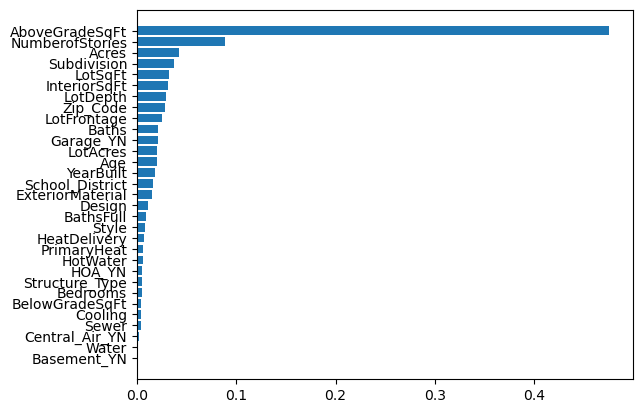

In [209]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

In [211]:
pf

,features,feature_importances
0,AboveGradeSqFt,0.475494
1,NumberofStories,0.088552
2,Acres,0.041896
3,Subdivision,0.037307
4,LotSqFt,0.032146
5,InteriorSqFt,0.030748
6,LotDepth,0.029422
7,Zip_Code,0.028554
8,LotFrontage,0.025380
9,Baths,0.021115


## As a result, the RandomForestRegressor Model provided a 72% accuracy when predicting Listing Price

# TESTING ML 2 : RidgeRegression

In [225]:
from sklearn import linear_model
ridge_model = linear_model.Ridge(alpha=1 ,solver='sag')
ridge_model.fit(X_train,y_train)

Ridge(alpha=1, solver='sag')

In [226]:
ridge_model.score(X_test,y_test)

0.5325047213998606

In [227]:
show_score(ridge_model)

{'Training MAE': 53825.71171696671,
 'Valid MAE': 51109.162177463084,
 'Training RMSLE': 0.2189367331410083,
 'Valid RMSLE': 0.21080801767783564,
 'Training R^2': 0.4006693846154752,
 'Valid R^2': 0.5325047213998606}

### As a result RidgeRegression performed poorly with a 53% accuracy

# Testing ML 3: LinearRegression

In [229]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [230]:
lin_reg.score(X_test,y_test)

0.5847212616569846

In [231]:
show_score(lin_reg)

{'Training MAE': 47250.85695545659,
 'Valid MAE': 47310.72000291151,
 'Training RMSLE': 0.18973158943172258,
 'Valid RMSLE': 0.19060309426340466,
 'Training R^2': 0.4838584419826638,
 'Valid R^2': 0.5847212616569846}